In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

data1 = pd.read_csv('../data/food_risk_oo.csv')
data1.head(3)

,店铺ID,店铺名,开始时间,地区名,销售额
0,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-01-01,滨湖区,313.5
1,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-02-01,滨湖区,376.2
2,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-03-01,滨湖区,501.6


In [2]:
data1.shape

(70943, 5)

In [3]:
data2 = pd.read_csv('../data/food_record.csv')
data2.head(3)

,店铺ID,店铺名,开始时间,风险值
0,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-01-01,0.147242
1,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-02-01,0.187812
2,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-03-01,0.313739


In [4]:
data2.shape

(72502, 4)

In [5]:
# 降低维度
data3 = data2[['店铺ID', '开始时间', '风险值']]
data3.head(3)

,店铺ID,开始时间,风险值
0,3d8ab846-7725-11ea-98c9-525400c74cae,2019-01-01,0.147242
1,3d8ab846-7725-11ea-98c9-525400c74cae,2019-02-01,0.187812
2,3d8ab846-7725-11ea-98c9-525400c74cae,2019-03-01,0.313739


In [6]:
# 对两张数据表进行合并，以'店铺ID','开始时间'为键
df = pd.merge(data1, data3, how='right', on=['店铺ID', '开始时间'])
df.head(3)

,店铺ID,店铺名,开始时间,地区名,销售额,风险值
0,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-01-01,滨湖区,313.5,0.147242
1,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-02-01,滨湖区,376.2,0.187812
2,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-03-01,滨湖区,501.6,0.313739


In [7]:
# 删除多余列（降维）
df = df.drop(['店铺ID'], axis=1)
df.head(3)

,店铺名,开始时间,地区名,销售额,风险值
0,1+7水饺店(金科世界城店),2019-01-01,滨湖区,313.5,0.147242
1,1+7水饺店(金科世界城店),2019-02-01,滨湖区,376.2,0.187812
2,1+7水饺店(金科世界城店),2019-03-01,滨湖区,501.6,0.313739


In [8]:
df.shape

(72502, 5)

In [9]:
# 查看重复值情况
df.duplicated().sum()

0

In [10]:
# 查看缺失值情况
df.isnull().sum()

店铺名     1559
开始时间       0
地区名     1559
销售额     1559
风险值        0
dtype: int64

In [11]:
# 删除有空值的行
df =df.dropna()
df.head(3)

,店铺名,开始时间,地区名,销售额,风险值
0,1+7水饺店(金科世界城店),2019-01-01,滨湖区,313.5,0.147242
1,1+7水饺店(金科世界城店),2019-02-01,滨湖区,376.2,0.187812
2,1+7水饺店(金科世界城店),2019-03-01,滨湖区,501.6,0.313739


In [12]:
df.shape

(70943, 5)

In [13]:
# 将销售额数据类型转换为整型
df['销售额'] = df['销售额'].astype(np.int32)
df.head(3)

,店铺名,开始时间,地区名,销售额,风险值
0,1+7水饺店(金科世界城店),2019-01-01,滨湖区,313,0.147242
1,1+7水饺店(金科世界城店),2019-02-01,滨湖区,376,0.187812
2,1+7水饺店(金科世界城店),2019-03-01,滨湖区,501,0.313739


In [14]:
# 对地区名进行热编码
# df = pd.get_dummies(df,columns=['地区名'])
# df.head(3)

In [15]:
# 对地区进行热编码

# 取唯一值
# city=df['地区名'].unique()
# print(city)

# dict_area = {city[i]:i+1 for i in range(len(city))}

# df['area'] = df['地区名'].map(dict_area)
# df.head()

In [16]:
# 利用 map()函数将日期映射为月份

df['开始时间'] = df['开始时间'].map(lambda x: int(x.split('-')[1]))
df.head(3)

,店铺名,开始时间,地区名,销售额,风险值
0,1+7水饺店(金科世界城店),1,滨湖区,313,0.147242
1,1+7水饺店(金科世界城店),2,滨湖区,376,0.187812
2,1+7水饺店(金科世界城店),3,滨湖区,501,0.313739


In [17]:
# 将销售额划分等级

def get_type(num):
    if int(num) >= 0 and int(num) <= 500:
        return 1
    elif int(num) > 500 and int(num) <= 1000:
        return 2
    elif int(num) > 1000 and int(num) <= 2500:
        return 3
    else:
        return 4


df['new_sale'] = df['销售额'].map(lambda x: get_type(x))

In [18]:
# 清洗好的数据
df.head()

,店铺名,开始时间,地区名,销售额,风险值,new_sale
0,1+7水饺店(金科世界城店),1,滨湖区,313,0.147242,1
1,1+7水饺店(金科世界城店),2,滨湖区,376,0.187812,1
2,1+7水饺店(金科世界城店),3,滨湖区,501,0.313739,2
3,1+7水饺店(金科世界城店),4,滨湖区,627,0.462676,2
4,1+7水饺店(金科世界城店),5,滨湖区,752,0.523725,2


In [19]:
# 每个地区平均风险值
risk = df['风险值'].groupby(df['地区名']).mean()
risk

地区名
宜兴市    0.382962
新吴区    0.371382
梁溪区    0.601527
江阴市    0.410754
滨湖区    0.481740
锡山区    0.323126
Name: 风险值, dtype: float64

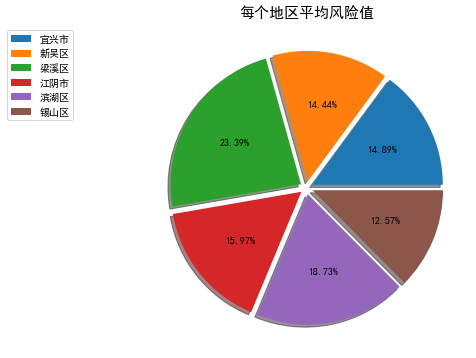

In [20]:
city = risk.index
value = risk.values

plt.figure(figsize=(10, 6), facecolor='w')
plt.title('每个地区平均风险值', fontsize=15)
explode = [0.05]*len(city)
plt.pie(value, explode, autopct='%.2f%%', shadow=True)
plt.legend(city, bbox_to_anchor=[-0.7, 0, 0.5, 1])
plt.show()

In [21]:
df['销售额'].describe()

count    70943.000000
mean      1213.428189
std        978.963272
min          0.000000
25%        487.000000
50%        901.000000
75%       1661.500000
max       6013.000000
Name: 销售额, dtype: float64

In [22]:
df['风险值'].mean()

0.4919123343364579

In [23]:
store = df.groupby(df['地区名']).count()
store

,店铺名,开始时间,销售额,风险值,new_sale
地区名,,,,,
宜兴市,6346,6346,6346,6346,6346
新吴区,9175,9175,9175,9175,9175
梁溪区,31616,31616,31616,31616,31616
江阴市,12373,12373,12373,12373,12373
滨湖区,7979,7979,7979,7979,7979
锡山区,3454,3454,3454,3454,3454


In [24]:
# 筛选出风险值大于等于平均风险值的店
high_risk_avg = df[df['风险值'] >= df['风险值'].mean()].groupby(df['地区名']).count()
high_risk_avg['店铺名']

地区名
宜兴市     1556
新吴区     2172
梁溪区    18868
江阴市     3774
滨湖区     3400
锡山区      702
Name: 店铺名, dtype: int64

In [25]:
# 筛选出风险值小于平均风险值的店
low_risk_avg = df[df['风险值'] < df['风险值'].mean()].groupby(df['地区名']).count()
low_risk_avg['店铺名']

地区名
宜兴市     4790
新吴区     7003
梁溪区    12748
江阴市     8599
滨湖区     4579
锡山区     2752
Name: 店铺名, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

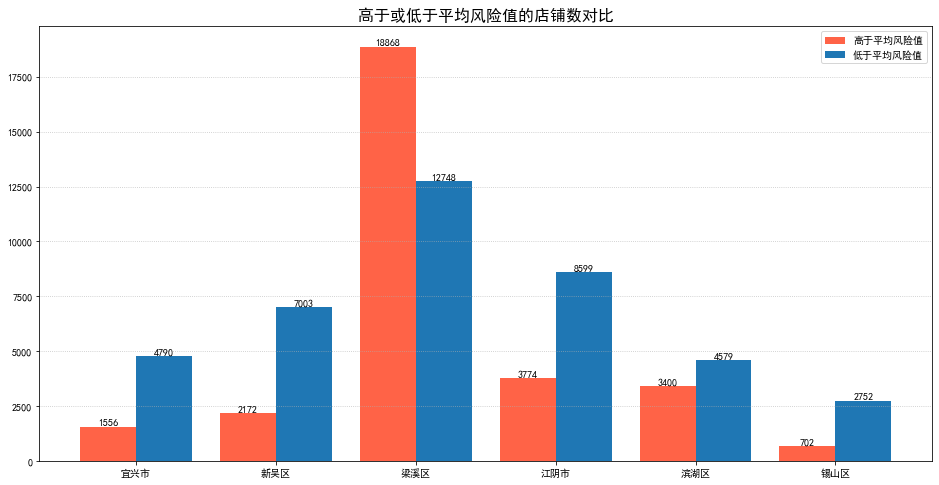

In [26]:
# 筛选出风险值小于平均风险值的店

x1 = high_risk_avg['店铺名'].values
x2 = low_risk_avg['店铺名'].values
ticks = high_risk_avg['店铺名'].index

plt.figure(figsize=(16, 8))
plt.title('高于或低于平均风险值的店铺数对比', fontsize=16)
plt.bar(np.arange(len(x1)), x1, width=0.4, color='tomato', label='高于平均风险值')
for x, y in enumerate(x1):
    plt.text(x, y, y, ha='center', va='bottom')

plt.bar(np.arange(len(x1))+0.4, x2, width=0.4, label='低于平均风险值')
for x, y in enumerate(x2):
    plt.text(x+0.4, y, y, ha='center', va='bottom')

plt.xticks(np.arange(len(x1))+0.4/2, ticks)

plt.grid(axis='y', ls=':', alpha=0.8)
plt.legend(fontsize=10)

plt.show

In [27]:
r1 = df[df['店铺名'] == '1+7水饺店(金科世界城店)']
r1

,店铺名,开始时间,地区名,销售额,风险值,new_sale
0,1+7水饺店(金科世界城店),1,滨湖区,313,0.147242,1
1,1+7水饺店(金科世界城店),2,滨湖区,376,0.187812,1
2,1+7水饺店(金科世界城店),3,滨湖区,501,0.313739,2
3,1+7水饺店(金科世界城店),4,滨湖区,627,0.462676,2
4,1+7水饺店(金科世界城店),5,滨湖区,752,0.523725,2
5,1+7水饺店(金科世界城店),6,滨湖区,940,0.590343,2
6,1+7水饺店(金科世界城店),7,滨湖区,877,0.626516,2
7,1+7水饺店(金科世界城店),8,滨湖区,815,0.462147,2
8,1+7水饺店(金科世界城店),9,滨湖区,689,0.431484,2
9,1+7水饺店(金科世界城店),10,滨湖区,627,0.293947,2


In [28]:
# 计算每个地区，每个月的销售总和
df['地区名'].unique()

array(['滨湖区', '宜兴市', '锡山区', '新吴区', '江阴市', '梁溪区'], dtype=object)

In [29]:
# new =df[['地区名','风险值','开始时间']].groupby(['开始时间']).sum()
# new

In [30]:
new = df[['风险值', '地区名', '开始时间']].groupby(['地区名', '开始时间']).sum()
new

风险值
地区名 开始时间            
宜兴市 1      78.279828
    2     121.330029
    3     150.825268
    4     234.632625
    5     263.471535
...              ...
锡山区 8     143.352491
    9     116.948631
    10     90.407512
    11     56.182274
    12     33.384316

[72 rows x 1 columns]

In [31]:
# 计算销售额最高的地区，每个月的风险值

sale = df['销售额'].groupby(df['地区名']).sum()
sale

地区名
宜兴市     5685226
新吴区     8354954
梁溪区    46642824
江阴市    12835625
滨湖区     9546672
锡山区     3018935
Name: 销售额, dtype: int32

In [32]:
city = df[df['地区名'] == '梁溪区']
city

,店铺名,开始时间,地区名,销售额,风险值,new_sale
40298,N多寿司（南禅寺店）,1,梁溪区,284,0.152760,1
40299,N多寿司（南禅寺店）,2,梁溪区,341,0.236170,1
40300,N多寿司（南禅寺店）,3,梁溪区,455,0.308476,1
40301,N多寿司（南禅寺店）,4,梁溪区,569,0.391279,2
40302,N多寿司（南禅寺店）,5,梁溪区,682,0.442153,2
...,...,...,...,...,...,...
72497,龙门铁板炒饭（崇安寺步行街店）,8,梁溪区,1349,0.635473,3
72498,龙门铁板炒饭（崇安寺步行街店）,9,梁溪区,1141,0.549814,3
72499,龙门铁板炒饭（崇安寺步行街店）,10,梁溪区,1038,0.372998,3
72500,龙门铁板炒饭（崇安寺步行街店）,11,梁溪区,934,0.268777,2


In [33]:
risk = city['风险值'].groupby(city['开始时间']).sum()
risk

开始时间
1      783.921268
2     1239.815940
3     1504.995857
4     1839.872309
5     1941.557348
6     2178.590689
7     2125.177215
8     2006.722730
9     1840.365026
10    1376.729516
11    1234.985751
12     945.144084
Name: 风险值, dtype: float64

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (12).

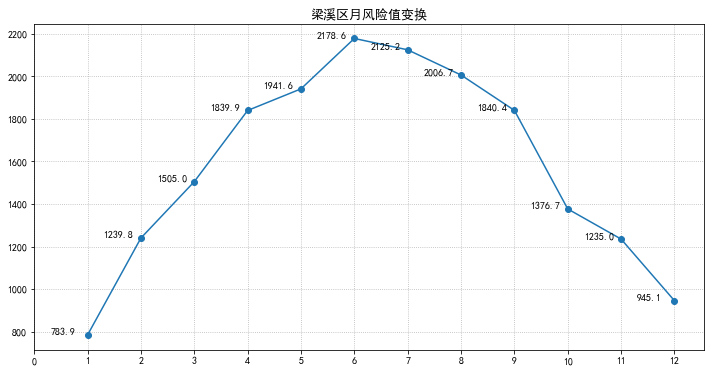

In [38]:
plt.figure(figsize=(12, 6))
plt.title('梁溪区月风险值变换', fontsize=13)
plt.plot(risk.index, risk.values, 'o-', label='梁溪区')
for x, y in enumerate(risk.values):
    plt.text(x+0.3, y, y.round(1))
plt.grid(axis='both', ls=':')
plt.xticks(np.arange(13),risk.index)
plt.legend()
plt.show()

In [35]:
# 计算每个地区的平均月销售额
new_df = df[['地区名', '销售额']]
df1 = new_df.groupby(df['地区名']).sum()
df2 = df1['销售额']/12/10000
df2.astype(np.int32)

地区名
宜兴市     47
新吴区     69
梁溪区    388
江阴市    106
滨湖区     79
锡山区     25
Name: 销售额, dtype: int32

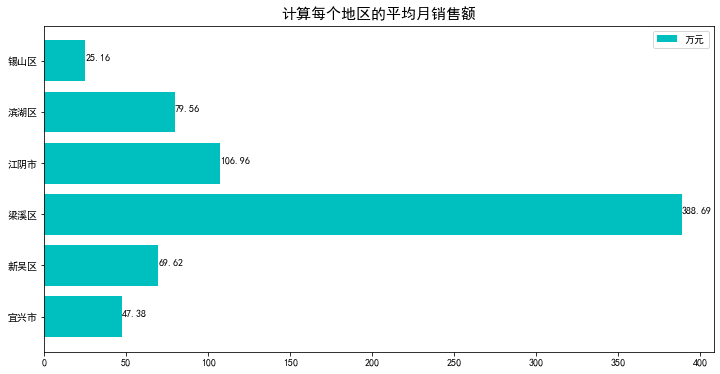

In [36]:
plt.figure(figsize=(12, 6))
plt.title('计算每个地区的平均月销售额', fontsize=15)
plt.barh(df2.index, df2.values, color='c', label='万元')
for x, y in enumerate(df2.values):
    plt.text(y, x, y.round(2))
plt.legend()
plt.show()